# Unsupervised learning and stock prices
Bryant Crocker

In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
init_notebook_mode(connected=True)
%matplotlib inline
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# Collecting Stock Prices

In this notebook I will examine several fashion stocks and attempt to gain insights about market structure.

Selected Securities:

* nke - Nike Athletics

* ads - Adidas Athletics 

* vfc - Vans Footwear Company

* uaa - Under Armor Athletics 

* aeo - Aeropostale 

* lb - Lbrands 

* goos - Canadian Goose

* ges - Guess?, Inc.

* rl - Ralph Lauren


In [99]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa,aeo,lb,goos,ges,rl,spy')
#Use the pd.head() method to get an idea of what the data looks like
prices.head()

,nke,ads,vfc,uaa,aeo,lb,goos,ges,rl,spy
Date,,,,,,,,,,
2017-03-16,56.688087,241.652786,52.063850,19.820000,13.816463,45.943016,16.080000,9.932523,78.408157,231.957306
2017-03-17,56.884922,241.573914,51.871555,19.379999,13.616364,47.055508,17.230000,10.344471,78.079201,231.549957
2017-03-20,57.750988,241.110474,51.794640,19.590000,13.340034,46.393532,17.100000,10.188846,76.879478,231.295959
2017-03-21,57.091595,235.934113,51.006222,18.990000,12.997005,45.216679,16.520000,9.959985,75.689430,228.326233
2017-03-22,53.066349,237.491974,51.044682,19.090000,13.216164,44.003059,16.049999,9.758589,75.670074,228.863525


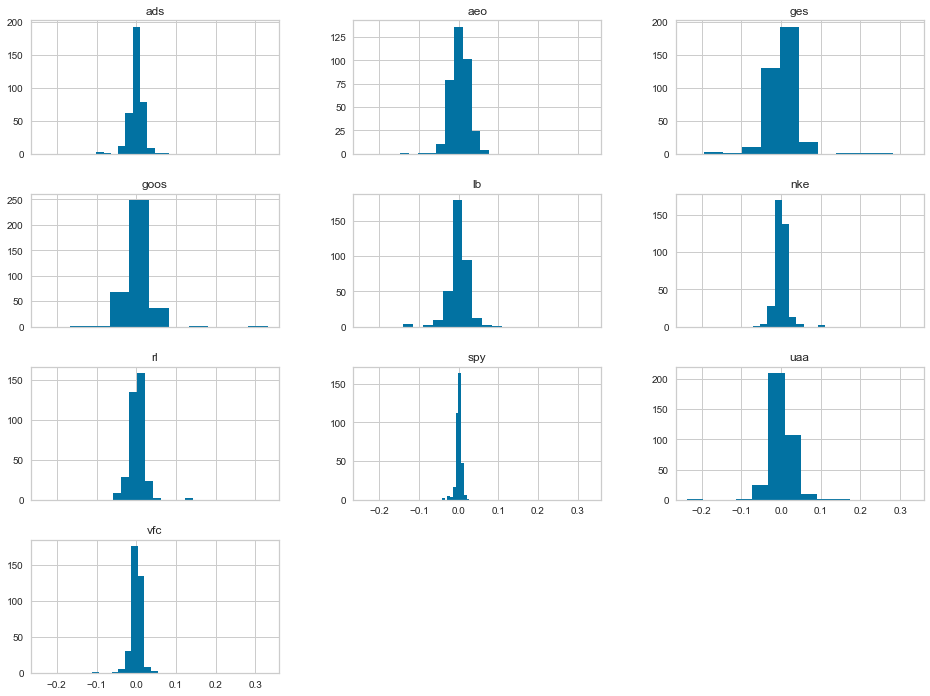

In [100]:
# convert prices to returns
returns = prices.to_returns()
returns.hist(figsize=(16, 12), sharex=True)
plt.show()

In [101]:
returns.dropna(inplace=True)

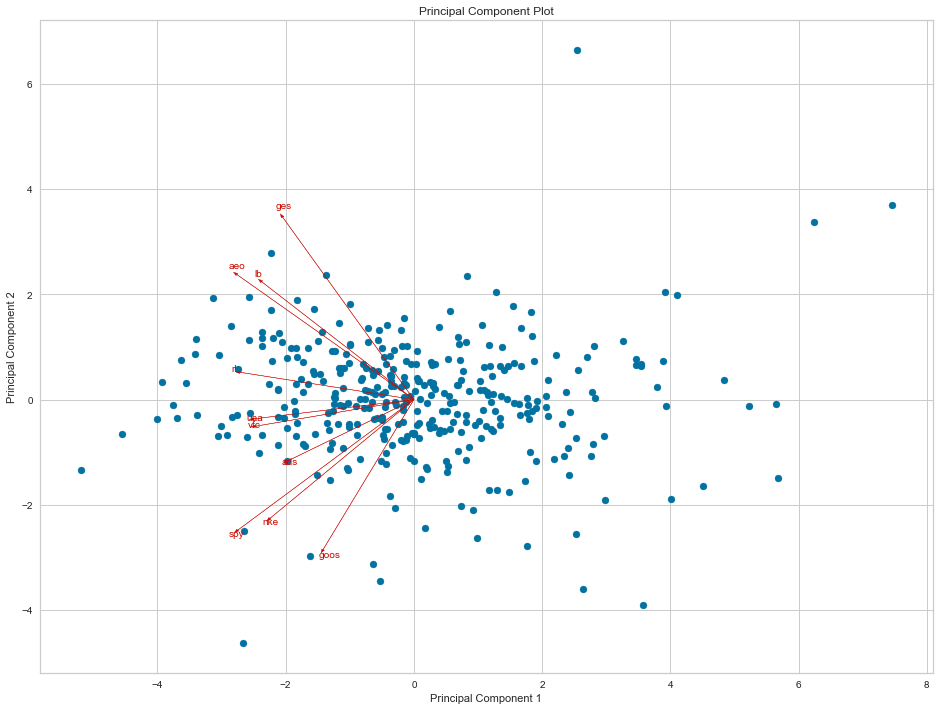

In [107]:
returns_array = returns.reset_index().drop('Date', 1)
# Perform the necessary imports
from yellowbrick.features.pca import PCADecomposition
fig, ax = plt.subplots(figsize=(16, 12))
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=2, ax = ax)
visualizer.fit_transform(returns_array)
visualizer.finalize()
plt.savefig('Pca.png')
plt.show()
